In [20]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(os.path.join("Bordeaux100.csv"))
df


,Region,Wine,LWIN11,Vintage,LWIN7,Index,Sub-Index,Latitude,Longitude,Mar-Sept avg rainfall,Critic Score,7/2021 Price,7/2020 Price,Percentage Change
0,Bordeaux (Red),Angelus,10060452017,2017,1006045,Bordeaux 500,Right Bank 100,44.892882,-0.1704865,470,95,2761.0,2888.04,-0.04
1,Burgundy (Red),Angelus,10060452016,2016,1006045,Bordeaux 500,Right Bank 100,44.892882,-0.1704865,418,95,3060.0,2799.96,0.09
2,Bordeaux (Red),Angelus,10060452015,2015,1006045,Bordeaux 500,Right Bank 100,44.892882,-0.1704865,353,96,2808.0,2499.96,0.12
3,Bordeaux (Red),Angelus,10060452014,2014,1006045,Bordeaux 500,Right Bank 100,44.892882,-0.1704865,473,93,2350.0,2280.00,0.03
4,Bordeaux (Red),Angelus,10060452013,2013,1006045,Bordeaux 500,Right Bank 100,44.892882,-0.1704865,526,90,2300.0,2270.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bordeaux (Red),Lafleur,10119022014,2014,1011902,Bordeaux 500,Right Bank 50,44.953112,-0.164187,473,95,5428.0,4740.00,0.15
96,Bordeaux (Red),Margaux,10127812017,2017,1012781,Bordeaux 500,Fine Wine 50,45.044418,-0.668706,470,97,3752.0,3459.96,0.08
97,Bordeaux (Red),Margaux,10127812016,2016,1012781,Bordeaux 500,Fine Wine 50,45.044418,-0.668706,418,96,5828.0,4839.96,0.20
98,Bordeaux (Red),Margaux,10127812015,2015,1012781,Bordeaux 500,Fine Wine 50,45.044418,-0.668706,353,97,10717.0,9900.00,0.08


In [22]:
#drop unecessary data
vino =df.drop(["Region","Wine","LWIN7","Index","Sub-Index",], axis=1)
vino

,LWIN11,Vintage,Latitude,Longitude,Mar-Sept avg rainfall,Critic Score,7/2021 Price,7/2020 Price,Percentage Change
0,10060452017,2017,44.892882,-0.1704865,470,95,2761.0,2888.04,-0.04
1,10060452016,2016,44.892882,-0.1704865,418,95,3060.0,2799.96,0.09
2,10060452015,2015,44.892882,-0.1704865,353,96,2808.0,2499.96,0.12
3,10060452014,2014,44.892882,-0.1704865,473,93,2350.0,2280.00,0.03
4,10060452013,2013,44.892882,-0.1704865,526,90,2300.0,2270.00,0.01
...,...,...,...,...,...,...,...,...,...
95,10119022014,2014,44.953112,-0.164187,473,95,5428.0,4740.00,0.15
96,10127812017,2017,45.044418,-0.668706,470,97,3752.0,3459.96,0.08
97,10127812016,2016,45.044418,-0.668706,418,96,5828.0,4839.96,0.20
98,10127812015,2015,45.044418,-0.668706,353,97,10717.0,9900.00,0.08


In [23]:
x = vino
y= vino['Percentage Change']

x.shape, y.shape

((100, 9), (100,))

In [24]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size =0.3,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regressor = RandomForestRegressor(n_estimators =100, random_state = 42)
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)

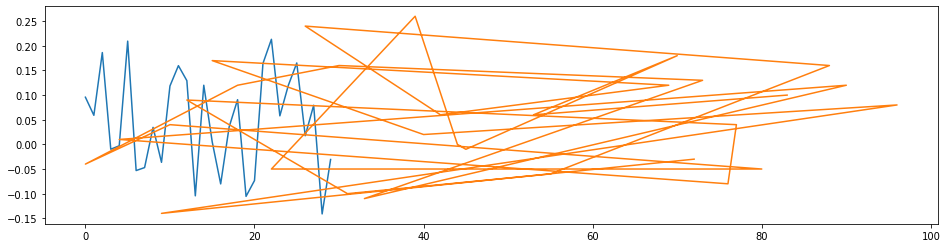

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)

In [27]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


0.011168363055225776